In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
galton = pd.read_csv('https://raw.githubusercontent.com/abby621/cs1070_materials/master/fl2019/demos/galton.csv')
galton

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


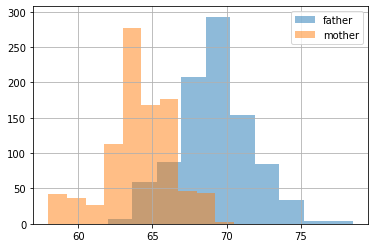

In [22]:
galton['father'].hist(alpha=0.5)
galton['mother'].hist(alpha=0.5)
plt.legend(['father','mother'])

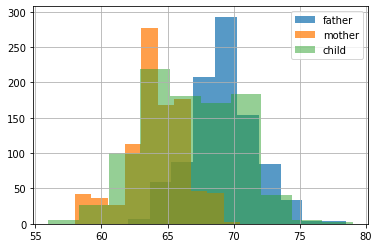

In [23]:
galton['father'].hist(alpha=0.75)
galton['mother'].hist(alpha=0.75)
galton['childHeight'].hist(alpha=0.5)
plt.legend(['father','mother','child'])

Question: Why are the father and mother bars taller than the child-height bars?

# Prediction

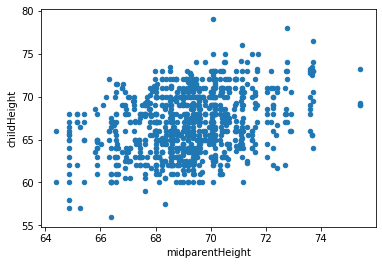

In [28]:
galton.plot.scatter('midparentHeight','childHeight')

How could we use this information to predict how tall a child is going to get? 

Let's assume our midParent height is 68.

In [40]:
close_to_68_mask = galton['midparentHeight'].between(67.5,68.5)
close_to_68_df = galton[close_heights_mask]
close_to_68_df[['midparentHeight','childHeight']]

,midparentHeight,childHeight
233,68.44,62.0
396,67.94,71.2
397,67.94,67.0
516,68.33,62.5
517,68.23,73.0
...,...,...
885,67.60,69.0
886,67.60,68.0
887,67.60,67.7
888,67.60,64.5


Idea: take all of the children whose parents were close to 68"

Average their heights.

That's our prediction for a new child whose midparentHeight is 68" but whose height we don't actually know!

In [41]:
close_to_68_df['childHeight'].mean()

66.24045801526718

Now how can we do this for any midparent height?

In [0]:
def predict_child(midparent):
  close_points_mask = galton['midparentHeight'].between(midparent-.5, midparent+.5)
  close_points_df = galton[close_points_mask]
  predicted_height = close_points_df['childHeight'].mean()
  return predicted_height

In [56]:
predicted_heights = []
for mp_height in np.arange(64,76,0.1):
    predicted_height = predict_child(mp_height)
    predicted_heights.append((mp_height, predicted_height))

predicted_heights_df = pd.DataFrame(data=predicted_heights,columns=['midparentHeight','childHeight'])
predicted_heights_df

,midparentHeight,childHeight
0,64.0,63.000000
1,64.1,63.000000
2,64.2,63.000000
3,64.3,63.000000
4,64.4,63.511765
...,...,...
115,75.5,70.100000
116,75.6,70.100000
117,75.7,70.100000
118,75.8,70.100000


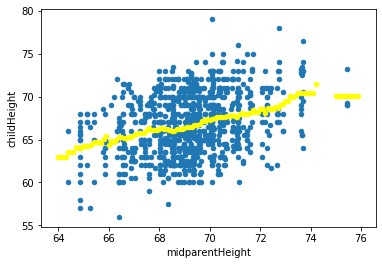

In [57]:
ax = galton.plot.scatter('midparentHeight','childHeight')
predicted_heights_df.plot.scatter('midparentHeight','childHeight',ax=ax,color='yellow')